<h1> <font color="blue"> Implementation for </font>Deutsch's Algorithm</h1>

<a id="task1"></a>
Oracle function called `oracle()`, which returns randomly a quantum circuit with 2 qubits corresponding to an either constant or a balanced function $f$. This circuit represents the operator $U_f$ in our algorithm. Note that qubit 0 is the input and qubit 1 is the output qubit.

Implement the proposed algorithm to decide whether or not your oracle function is constant or even. 

<h5>Qiskit notes:</h5>

- `circuit += oracle()` is used to add the oracle to your whole circuit. (In general, functions can be defined returning circuits and append them to your circuit by `+=`.)
- Barriers are not quantum programming primitives but they instruct qiskit to not apply any optimizations across the barrier and also useful for visualization. You may add them to your circuit using `circuit.barrier()`.


<h3> Implementation </h3>

In [7]:
%run ../include/oracle.py

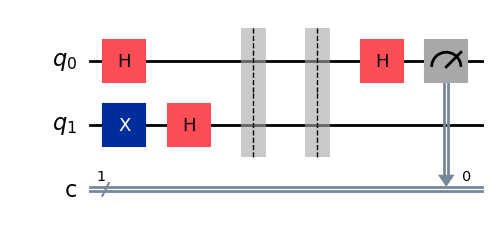

In [3]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator

circuit = QuantumCircuit(2, 1)

# Apply X and H to qubit 1
circuit.x(1)
circuit.h(1)

# Apply H to qubit 0
circuit.h(0)

# Apply oracle
circuit.compose(oracle(), inplace=True)

# Apply H to qubit 0
circuit.h(0)

# Measure qubit 0
circuit.measure(0, 0)

circuit.draw(output='mpl')

In [4]:
job = AerSimulator().run(circuit,shots=10000)
counts = job.result().get_counts()
print(counts)

{'0': 10000}


<a id="Task Next"></a>

<h3> Task next </h3> 

There are four possible functions $f(x)$. Could you identify what these are? 

Write down the `oracle()` function which implements each. That is, you should construct a circuit implementing $U_f: \ket{x}\ket{y} \mapsto \ket{x}\ket{y \oplus f(x)} $. 

Note that qubit 0 is the input and qubit 1 is the output qubit. One of the functions is implemented for you to give you an idea.

<h3>Implementation</h3>

Oracle 1:
Visualizing oracle1


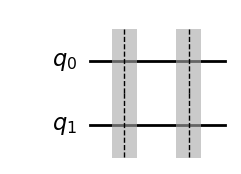

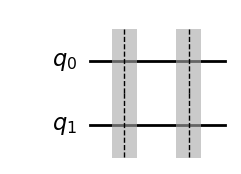

Oracle 2:
Visualizing oracle2


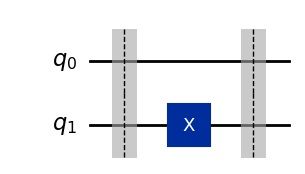

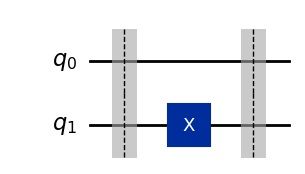

Oracle 3:
Visualizing oracle3


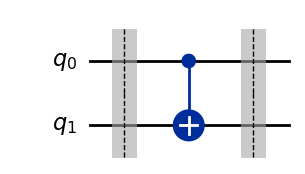

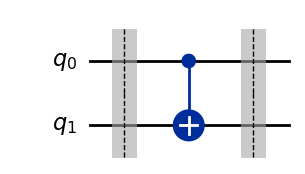

Oracle 4:
Visualizing oracle4


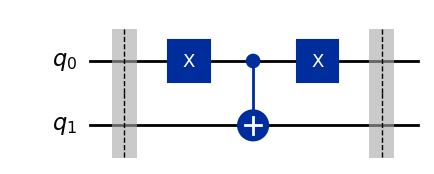

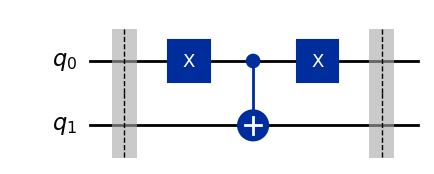

In [21]:
import random
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator

# Oracle functions with visualization

# f(0)=f(1)=0
def oracle1():
    circuit = QuantumCircuit(2)
    circuit.barrier()
    # do nothing
    circuit.barrier()
    display(circuit.draw(output='mpl'))  # Draw the circuit
    return circuit

# f(0)=f(1)=1
def oracle2():
    circuit = QuantumCircuit(2)
    circuit.barrier()
    circuit.x(1)
    circuit.barrier()
    display(circuit.draw(output='mpl'))  # Draw the circuit
    return circuit

# f(0)=0, f(1)=1
def oracle3():
    circuit = QuantumCircuit(2)
    circuit.barrier()
    circuit.cx(0, 1)
    circuit.barrier()
    display(circuit.draw(output='mpl'))  # Draw the circuit
    return circuit

# f(0)=1, f(1)=0
def oracle4():
    circuit = QuantumCircuit(2)
    circuit.barrier()
    circuit.x(0)
    circuit.cx(0, 1)
    circuit.x(0)
    circuit.barrier()
    display(circuit.draw(output='mpl'))  # Draw the circuit
    return circuit

# Visualize each oracle to verify correctness
def visualize_oracle(oracle_function):
    print(f"Visualizing {oracle_function.__name__}")
    qc = oracle_function()  # Generate the quantum circuit
    display(qc.draw(output='mpl'))  # Draw the quantum circuit

# List of oracles
oracles = [oracle1, oracle2, oracle3, oracle4]

# Check and visualize each oracle
for i, oracle in enumerate(oracles, start=1):
    print(f"Oracle {i}:")
    visualize_oracle(oracle)
